In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [53]:
result= pd.read_csv('output_data/buggy_commits_lines_flag_clone.csv')
dl_taxonomy_class=pd.read_csv('preprocess_data/ReposATaxonomy/labeled_phases.csv')

In [54]:
def get_list_files(row):
    files_in = row['files']
    repoName = row['repoName']
    files_list=list()
    files=files_in.split(',')
    for file in files:
        file=file.replace('{','').replace('}','').replace('[','').replace(']','').replace('../clone_code/dl/','').replace(repoName+'/','').replace('.pyindent','').replace('\'','').strip()
        files_list.append(file)
    return files_list

In [55]:
dl_taxonomy_class['files_list']=dl_taxonomy_class.apply(get_list_files, axis=1)

In [56]:
dl_taxonomy=(dl_taxonomy_class['files_list'].apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('file').join(dl_taxonomy_class[['repoName','classid','granularity','nb_fragment','similarity','clone_type','project_type','category','locc','clone category','dl_phase','sub_class','comments']], how='left'))

In [57]:
type1=pd.read_csv('clone_data/dl_type1.csv')
type2=pd.read_csv('clone_data/dl_type2.csv')
type3=pd.read_csv('clone_data/dl_type3.csv')

In [58]:
type1['clone_type']='type 1'
type2['clone_type']='type 2'
type3['clone_type']='type 3'

In [59]:
clones = [type1, type2, type3]

dl_clones = pd.concat(clones)

In [60]:
def update_granularity(row):
    if 'block' in row['granularity']:
        return 'Block'
    elif 'function' in row['granularity']:
        return 'Function'

In [61]:
def update_file(row):
    file=row['file']
    repoName = row['repoName']
    return file.replace('../clone_code/dl/','').replace(repoName+'/','').replace('.pyindent','')

In [62]:
dl_clones['granularity']=dl_clones.apply(update_granularity, axis=1)

In [63]:
dl_clones['file']=dl_clones.apply(update_file, axis=1)

In [64]:
dl_taxonomy

,file,repoName,classid,granularity,nb_fragment,similarity,clone_type,project_type,category,locc,clone category,dl_phase,sub_class,comments
0,berrynet/engine/tflite_engine.py,BerryNet,25,Function,2,100,type 1,Deep Learning,0,6,Same file,data collection,load label,get labels from file
1,inference/movidius.py,BerryNet,13,Function,2,100,type 1,Deep Learning,1,12,Same directory,model training,measure the accuracy of the model,iou (intersection over union) metric measure t...
1,inference/yoloutils.py,BerryNet,13,Function,2,100,type 1,Deep Learning,1,12,Same directory,model training,measure the accuracy of the model,iou (intersection over union) metric measure t...
2,inference/darkflow_engine.py,BerryNet,20,Function,2,100,type 1,Deep Learning,1,28,Same directory,data postprocessing,object localization,draw bounding boxes on an image from inference...
2,inference/detection_server.py,BerryNet,20,Function,2,100,type 1,Deep Learning,1,28,Same directory,data postprocessing,object localization,draw bounding boxes on an image from inference...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,tensorflow_python/losses_test.py,ranking,7,Function,6,100,type 2,Deep Learning,1,4,Same directory,model construction,model parameters initialization,set up model
94,tensorflow_python/metrics_test.py,ranking,8,Function,2,100,type 2,Deep Learning,1,8,Same directory,model evaluation,model performance metric computation,check metric against value
94,tensorflow_python/losses_test.py,ranking,8,Function,2,100,type 2,Deep Learning,1,8,Same directory,model evaluation,model performance metric computation,check metric against value
95,tensorflow_python/metrics.py,ranking,9,Function,2,78,type 3,Deep Learning,0,34,Same file,model evaluation,model performance metric computation,normalized_discounted_cumulative_gain discount...


In [65]:
dl_clones

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type
0,adanet,1,ensemble/ensembler.py,29,48,73,100,Block,type 1
1,adanet,1,subnetwork/generator.py,42,61,695,100,Block,type 1
2,adanet,2,core/evaluator_test.py,121,126,204,100,Block,type 1
3,adanet,2,core/evaluator_test.py,140,145,208,100,Block,type 1
4,adanet,3,core/testing_utils.py,43,49,477,100,Block,type 1
...,...,...,...,...,...,...,...,...,...
33930,waifu2x-chainer,3,lib/srcnn.py,116,128,35,100,Function,type 3
33931,waifu2x-chainer,3,lib/srcnn.py,147,159,37,100,Function,type 3
33932,waifu2x-chainer,4,waifu2x.py,17,33,51,71,Function,type 3
33933,waifu2x-chainer,4,appendix/benchmark.py,23,37,56,71,Function,type 3


In [66]:
dl_fct = pd.merge(dl_taxonomy, dl_clones, how='left', on=['repoName', 'classid', 'file','granularity','similarity','clone_type'])

In [67]:
dl_fct.to_csv('preprocess_data/dl_fct.csv',index=False)

In [68]:
dl_fct

,file,repoName,classid,granularity,nb_fragment,similarity,clone_type,project_type,category,locc,clone category,dl_phase,sub_class,comments,startline,endline,pcid
0,berrynet/engine/tflite_engine.py,BerryNet,25,Function,2,100,type 1,Deep Learning,0,6,Same file,data collection,load label,get labels from file,102,107,241
1,berrynet/engine/tflite_engine.py,BerryNet,25,Function,2,100,type 1,Deep Learning,0,6,Same file,data collection,load label,get labels from file,183,188,247
2,inference/movidius.py,BerryNet,13,Function,2,100,type 1,Deep Learning,1,12,Same directory,model training,measure the accuracy of the model,iou (intersection over union) metric measure t...,176,187,66
3,inference/yoloutils.py,BerryNet,13,Function,2,100,type 1,Deep Learning,1,12,Same directory,model training,measure the accuracy of the model,iou (intersection over union) metric measure t...,92,103,105
4,inference/darkflow_engine.py,BerryNet,20,Function,2,100,type 1,Deep Learning,1,28,Same directory,data postprocessing,object localization,draw bounding boxes on an image from inference...,66,93,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,tensorflow_python/losses_test.py,ranking,8,Function,2,100,type 2,Deep Learning,1,8,Same directory,model evaluation,model performance metric computation,check metric against value,1091,1098,191
260,tensorflow_python/metrics.py,ranking,9,Function,2,78,type 3,Deep Learning,0,34,Same file,model evaluation,model performance metric computation,normalized_discounted_cumulative_gain discount...,288,321,56
261,tensorflow_python/metrics.py,ranking,9,Function,2,78,type 3,Deep Learning,0,34,Same file,model evaluation,model performance metric computation,normalized_discounted_cumulative_gain discount...,322,352,57
262,tensorflow_python/losses_impl.py,ranking,30,Function,2,83,type 3,Deep Learning,0,22,Same file,model evaluation,model performance metric computation,eval metric,411,432,250


In [69]:
bug_inducing_commit_lines=pd.read_csv('output_data/bug_inducing_commits_lines.csv')

In [70]:
bug_inducing_commit_lines

,repoName,buggy_inducing_commit,buggy_inducing_file,buggy_inducing_lines
0,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/evaluator.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/estimator_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/iteration.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...
374,ranking,b7e72bbbe439dbad99ad7e4a1f7fc00d90410017,tensorflow_ranking/python/metrics_test.py,"{47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 5..."
375,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,tensorflow_ranking/python/metrics_test.py,"{686, 687, 688, 689, 690, 691, 692, 693, 694, ..."
376,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
377,ranking,cb63285bf65e8145af0443bdd6286b64a6d5449d,tensorflow_ranking/python/keras/feature.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [71]:
def lines_intersects_with_clone_code(lines, start_line, end_line):
    print(lines, start_line,end_line)
    print(type(lines), type(start_line),type(end_line))
    found = list(filter(lambda x: start_line <= x <= end_line, lines))
    print(found)
    if len(found)>0:
        return True
    else:
        return False

In [72]:
lines_intersects_with_clone_code({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14},8,20)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14} 8 20
<class 'set'> <class 'int'> <class 'int'>
[8, 9, 10, 11, 12, 13, 14]


True

In [73]:
def transform_lines_to_set(lines):
    lines_list=set()
    for i in lines.split(','):
        lines_list.add(int(i.replace('{','').replace('}','')))
    return lines_list

In [74]:
for index1,row1 in dl_fct.iterrows():
    for index2,row2 in bug_inducing_commit_lines.iterrows():              
        if (row2['repoName']==row1['repoName']) and (row2['buggy_inducing_file']==row1['file']) and (row1['commit']==row2['buggy_inducing_commit']):
            print('repoName2',row2['repoName'],'repoName1',row1['repoName'],'file2 ',row2['buggy_inducing_file'],'file1',row1['file'])
            if (lines_intersects_with_clone_code(transform_lines_to_set(row2['buggy_inducing_lines']),row1['startline'],row1['endline'])):
                dl_fct.loc[index1, 'bug_inducing'] = True

repoName2 BerryNet repoName1 BerryNet file2  berrynet/engine/tflite_engine.py file1 berrynet/engine/tflite_engine.py
{99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 212, 213, 214, 215, 216, 237, 238, 239, 240, 241} 102 107
<class 'set'> <class 'int'> <class 'int'>
[102, 103, 104, 105, 106, 107]
repoName2 BerryNet repoName1 BerryNet file2  berrynet/engine/tflite_engine.py file1 berrynet/engine/tflite_engine.py
{99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 

repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/models/autoint.py file1 deepctr/models/autoint.py
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103} 20 88
<class 'set'> <class 'int'> <class 'int'>
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/models/autoint.py file1 deepctr/models/autoint.py
{64, 68, 69, 71, 72, 13, 78, 47, 48, 15, 50, 80, 52, 57, 62, 63} 

repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,

repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{49, 88, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184} 408 415
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{181} 408 415
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{129, 124} 408 415
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{1, 2, 3, 4, 5, 6,

repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/utils.py file1 deepctr/layers/utils.py
{45, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109} 113 118
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/utils.py file1 deepctr/layers/utils.py
{16} 113 118
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/utils.py file1 deepctr/layers/utils.py
{45, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109} 60 65
<class 'set'> <class 'int'> <class 'int'>
[62, 63, 64, 65]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/utils.py file1 deepctr/layers/utils.py
{16} 60 65
<class 'set

repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,

repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{387, 645, 646, 647, 391, 648, 17, 18, 19, 20, 22, 56, 66, 67, 196, 201, 202, 203, 204, 83, 468, 85, 469, 471, 88, 472, 473, 475, 476, 505} 174 179
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{49, 88, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184} 174 179
<class 'set'> <class 'int'> <class 'int'>
[174, 175, 176, 177, 178, 179]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{181} 174 179
<class 's

repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{181} 134 139
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 DeepCTR repoName1 DeepCTR file2  deepctr/layers/sequence.py file1 deepctr/layers/sequence.py
{129, 124} 134 139
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 nn-wtf repoName1 nn-wtf file2  nn_wtf/input_data.py file1 nn_wtf/input_data.py
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,

repoName2 nn-wtf repoName1 nn-wtf file2  nn_wtf/predictor.py file1 nn_wtf/predictor.py
{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33} 26 29
<class 'set'> <class 'int'> <class 'int'>
[26, 27, 28, 29]
repoName2 nn-wtf repoName1 nn-wtf file2  nn_wtf/predictor.py file1 nn_wtf/predictor.py
{33, 34, 35, 36, 37, 38, 8, 9, 10, 11, 13, 18, 19, 22, 23} 26 29
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 nn-wtf repoName1 nn-wtf file2  nn_wtf/predictor.py file1 nn_wtf/predictor.py
{35} 26 29
<class 'set'> <class 'int'> <class 'int'>
[]
repoName2 nn-wtf repoName1 nn-wtf file2  nn_wtf/predictor.py file1 nn_wtf/predictor.py
{36, 37, 38, 39, 40, 41, 22, 23, 24, 25, 30, 31} 26 29
<class 'set'> <class 'int'> <class 'int'>
[]


In [77]:
dl_fct_buggy=dl_fct[dl_fct['bug_inducing']==True]

In [78]:
dl_fct_buggy

,file,repoName,classid,granularity,nb_fragment,similarity,clone_type,project_type,category,locc,clone category,dl_phase,sub_class,comments,startline,endline,pcid,bug_inducing
0,berrynet/engine/tflite_engine.py,BerryNet,25,Function,2,100,type 1,Deep Learning,0,6,Same file,data collection,load label,get labels from file,102,107,241,True
8,berrynet/service/tflite_service.py,BerryNet,27,Function,5,100,type 2,Deep Learning,1,6,Same directory,model construction,model parameters initialization,initializing model parameters with config,36,41,144,True
9,berrynet/service/tflite_service.py,BerryNet,27,Function,5,100,type 2,Deep Learning,1,6,Same directory,model construction,model parameters initialization,initializing model parameters with config,84,89,147,True
22,berrynet/service/tflite_service.py,BerryNet,27,Function,6,71,type 3,Deep Learning,1,6,Same directory,model construction,model parameters initialization,initializing model parameters with config,36,41,144,True
23,berrynet/service/tflite_service.py,BerryNet,27,Function,6,71,type 3,Deep Learning,1,6,Same directory,model construction,model parameters initialization,initializing model parameters with config,84,89,147,True
24,berrynet/engine/openvino_engine.py,BerryNet,34,Function,2,90,type 3,Deep Learning,1,43,Same directory,data preprocessing,parse arguments,preprocess the data before training,359,401,214,True
25,berrynet/engine/tflite_engine.py,BerryNet,34,Function,2,90,type 3,Deep Learning,1,43,Same directory,data preprocessing,parse arguments,preprocess the data before training,189,230,248,True
37,inference/engineservice.py,BerryNet,21,Function,2,100,type 1,Deep Learning,2,9,Different directories,model construction,model parameters initialization,NaN,43,51,88,True
42,inference/movidius_engine.py,BerryNet,17,Function,2,100,type 1,Deep Learning,2,5,Different directories,data postprocessing,process output,call process output inception v3,43,47,79,True
44,inference/movidius_engine.py,BerryNet,16,Function,2,100,type 1,Deep Learning,2,4,Different directories,model construction,model parameters initialization,NaN,33,36,76,True


In [95]:
dl_fct_buggy['bug_inducing_count']=1

In [7]:
dl_fct_buggy.describe()

,classid,nb_fragment,similarity,category,locc,startline,endline,pcid,bug_inducing_count
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0
mean,14.783784,5.027027,82.621622,0.756757,13.081081,93.432432,104.918919,101.972973,1.0
std,9.727210,6.107766,12.421646,0.760314,16.133778,91.297907,93.793620,55.150545,0.0
min,1.000000,2.000000,70.000000,0.000000,4.000000,8.000000,17.000000,26.000000,1.0
25%,6.000000,2.000000,72.000000,0.000000,5.000000,36.000000,47.000000,64.000000,1.0
50%,17.000000,3.000000,75.000000,1.000000,7.000000,60.000000,75.000000,91.000000,1.0
75%,20.000000,4.000000,100.000000,1.000000,13.000000,102.000000,113.000000,126.000000,1.0
max,34.000000,22.000000,100.000000,2.000000,69.000000,408.000000,415.000000,248.000000,1.0


In [103]:
dl_fct_buggy.to_csv('output_data/dl_fct_buggy.csv', index=False)

In [2]:
dl_fct_buggy=pd.read_csv('output_data/dl_fct_buggy.csv')

In [48]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2- 0.05
        y = p.get_y() + p.get_height()+0.08
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

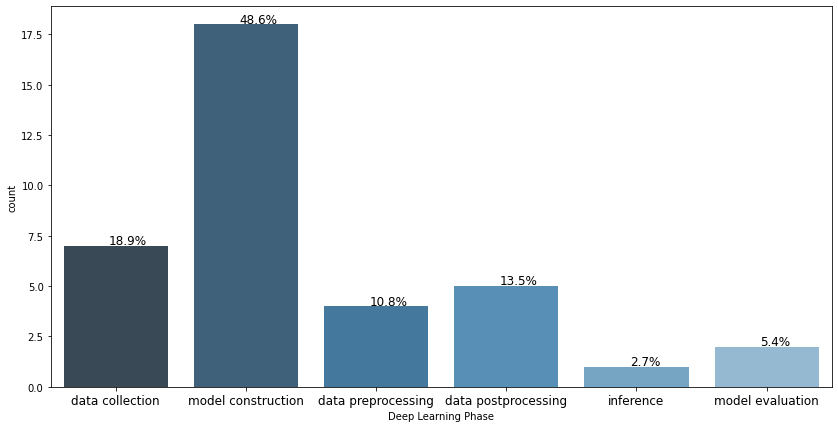

In [62]:
plt.figure(figsize=(14,7))
ax=sns.countplot('dl_phase', data=dl_fct_buggy,palette="Blues_d")
plt.xticks(size=12)
plt.xlabel('Deep Learning Phase')
#plt.yticks(size=12)
#plt.ylabel('bug_inducing_count', size=12)
without_hue(ax, dl_fct_buggy.bug_inducing_count)

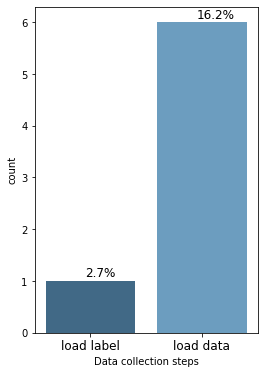

In [65]:
plt.figure(figsize=(4,6))
ax=sns.countplot('sub_class', data=dl_fct_buggy[dl_fct_buggy['dl_phase']=='data collection'],palette="Blues_d")
plt.xticks(size=12)
plt.xlabel('Data collection steps')
#plt.yticks(size=12)
#plt.ylabel('bug_inducing_count', size=12)
without_hue(ax, dl_fct_buggy.bug_inducing_count)

In [90]:
dl_fct_buggy[dl_fct_buggy['dl_phase']=='model evaluation']

,file,repoName,classid,granularity,nb_fragment,similarity,clone_type,project_type,category,locc,clone category,dl_phase,sub_class,comments,startline,endline,pcid,bug_inducing,bug_inducing_count
35,nn_wtf/predictor.py,nn-wtf,6,Function,2,80,type 3,Deep Learning,0,4,Same file,model evaluation,prediction,predict test data,18,21,65,True,1
36,nn_wtf/predictor.py,nn-wtf,6,Function,2,80,type 3,Deep Learning,0,4,Same file,model evaluation,prediction,predict test data,26,29,67,True,1


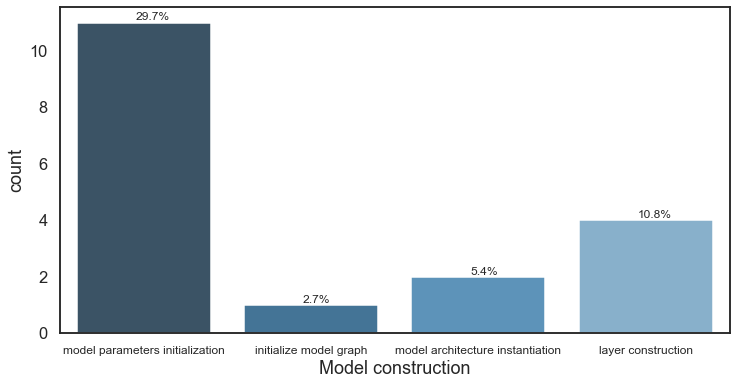

In [84]:
plt.figure(figsize=(12,6))
ax=sns.countplot('sub_class', data=dl_fct_buggy[dl_fct_buggy['dl_phase']=='model construction'],palette="Blues_d")
plt.xticks(size=12)
plt.xlabel('Model construction')
#plt.yticks(size=12)
#plt.ylabel('bug_inducing_count', size=12)
without_hue(ax, dl_fct_buggy.bug_inducing_count)